In [2]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [3]:
import sys
import os
import datetime as dt
import matplotlib.pyplot as plt
import matplotlib
import pandas as pd
import netCDF4 as cdf
import numpy as np
import pylab as plb
from tm5tools import globarea
import calendar

In [4]:
#labels = ['SiBCASA-GFED4','GFAS','FINN','CASA-GFED4-hourly','CASA-GFED4-d']
labels = ['CASA-GFED4-3hourly']

biofireparamdirs=[
#'/Storage/CO2/carbontracker/input/ctdas_2012/biosphere/gfed4_daily_sibcasa_3hr/',
#'/Storage/CO2/carbontracker/input/ctdas_2012/biosphere/gfed4_daily_sibcasa_3hr_gfas_fires/',
#'/Storage/CO2/carbontracker/input/ctdas_2012/biosphere/gfed4_daily_sibcasa_3hr_finn_fires/', #FINN
'/Storage/CO2/carbontracker/input/ctdas_2012/biosphere/casa-gfed4-3h-fires-monthly-bio/', #CASA-GFED4 fires 3h
#'/Storage/CO2/carbontracker/input/ctdas_2012/biosphere/casa-gfed4-daily-fires-monthly-bio/'#CASA-GFED4 fires daily
]
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'] 

In [5]:
fac = 86400.*365.*12./1.e15
glarea = globarea(im=360,jm=180)
mf = cdf.Dataset('/Users/botia/daily_fires/amazon_mask.nc')
mask = mf.variables['regionmask'][:]

/Storage/CO2/carbontracker/input/ctdas_2012/biosphere/casa-gfed4-3h-fires-monthly-bio/
2010
(2920,) (2920,)
2011
(5840,) (5840,)
2012
(8768,) (8768,)
2013
(11688,) (11688,)
2014
(14608,) (14608,)
2015
(17528,) (17528,)


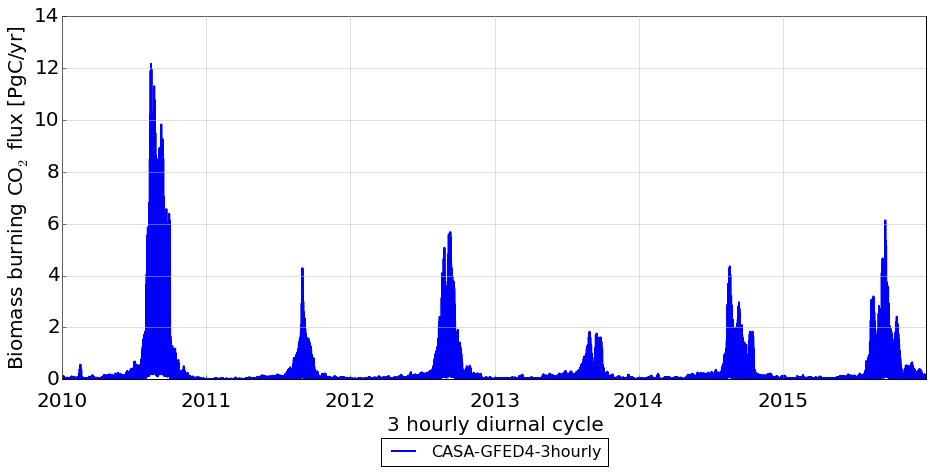

In [5]:
fig = plt.figure(1,figsize=(15,8))
ax = fig.add_axes([0.1,0.2,0.8,0.7])
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')

minyear = 2010
maxyear = 2016

for ii,dirbf in enumerate(biofireparamdirs):
    alltimes = []
    allbb = []
    print dirbf
    for y in range(minyear,maxyear):
        print y
        for fname in os.listdir(dirbf):
            if fname.startswith('READ'): continue
            if not int(fname[-9:-5]) == y: continue
            #print fname
            bf = cdf.Dataset(dirbf+fname)
            if 'time' in bf.variables.keys():
                # Reading time from each monthly file in the directory
                time = bf.variables['time'][:]
                # time = dt.datetime(year,month,day,0,0,0) + dt.timedelta(hours)
                time = [dt.datetime(int(fname[-9:-5]),int(fname[-5:-3]),1,0,0,0) + dt.timedelta(hours=int(t*3)) for t in time]
            if 'co2fire' in bf.variables.keys():
                bb = np.float32(bf.variables['co2fire'][:])
            else: bb = bf.variables['bb'][:]
            if int(fname[-5:-3]) == 1:              
                bb_year = bb    
            else: 
                bb_year = np.append(bb_year,bb,axis=0)
            bf.close()
            alltimes = np.append(alltimes,time)
            bb_diurnal = (bb_year*mask*glarea*fac).sum(axis=1).sum(axis=1) # bb_diurnal is a numpy array, adding spatially 
            #across lat and lon
        allbb = np.append(allbb,bb_diurnal)
        print shape(allbb),shape(alltimes)
            
ax.plot(alltimes,allbb,label=labels[ii],lw=2)
#ax.xaxis.set_major_formatter(matplotlib.dates.DateFormatter('%b\n%Y'))
ax.grid(True, ls='-', color='0.75') # setting the grid and the color on a grey scale
ax.set_ylabel('Biomass burning CO$_2$ flux [PgC/yr]',fontsize=20)
ax.set_xlabel('3 hourly diurnal cycle',fontsize=20)
dummy=[lab.set_fontsize(20) for lab in ax.get_xticklabels()]
dummy=[lab.set_fontsize(20) for lab in ax.get_yticklabels()]
ax.tick_params(axis='x', pad=12)
box = ax.get_position()
ax.set_position([box.x0, box.y0 + box.height * 0.1,box.width, box.height * 0.9])
ax.legend(loc='upper center',bbox_to_anchor=(0.5,-0.14),ncol=2,prop={'size':16})
fig.savefig('Fig3_Diurnal_Cycle_2010-2016.png')

In [15]:
# shape(alltimes), shape(allbb), type(alltimes)


In [2]:
############################################# Dataframes ###############################################################

minyear = 2015
maxyear = 2016
#times = pd.date_range('00:00', '21:00', freq = '3h')
times = np.arange(dt.datetime(minyear,1,1,0,0,0), dt.datetime(minyear,1,2,0,0,0),dt.timedelta(hours=3))
arr = np.empty([8,12])
arr[:] = np.NAN
dataframe = pd.DataFrame(arr, index = times, columns = ['1','2','3','4','5','6','7','8','9','10','11','12'])

for y in range(minyear,maxyear):
    print y
    for m in range(1,13):
        #print m
        for h,j in enumerate(range(0,24,3)):
            index_hourly_avg_month = [i for i,d in enumerate(alltimes) if d.year == y and d.month == m and d.hour == j]
            hourly_avg_month = '%.5f' % (allbb[index_hourly_avg_month].mean())
            dataframe.iat[h,m-1] = hourly_avg_month
    #df_2010 = dataframe
    #df_2011 = dataframe
    #df_2012 = dataframe
    #df_2013 = dataframe
    #df_2014 = dataframe
    df_2015 = dataframe
    '''
        if y == 2010:
            df_2010 = dataframe
        if y == 2011:
            df_2011 = dataframe
        if y == 2012:
            df_2012 = dataframe
        if y == 2013:
            df_2013 = dataframe
        if y == 2014:
            df_2014 = dataframe
        if y == 2015:
            df_2015 = dataframe
        
#df_2010  
#df_2011
#df_2012
#df_2013
#df_2014
#df_2015 '''

2015


NameError: name 'alltimes' is not defined

In [9]:
# These files contain the average for each time step, in each month in each year
'''
df_2010.to_pickle('df_2010')  
df_2011.to_pickle('df_2011')
df_2012.to_pickle('df_2012')
df_2013.to_pickle('df_2013')
df_2014.to_pickle('df_2014')
'''

df_2015.to_pickle('df_2015')


" This plots directly the graph taking the dataframe, dont know how to format it.    \ndf_2010.plot(title='3 hourly monthly averages - 2010')\ndf_2011.plot(title='3 hourly monthly averages - 2011')\ndf_2012.plot(title='3 hourly monthly averages - 2012')\ndf_2013.plot(title='3 hourly monthly averages - 2013')\ndf_2014.plot(title='3 hourly monthly averages - 2014')\ndf_2015.plot(title='3 hourly monthly averages - 2015')\n"

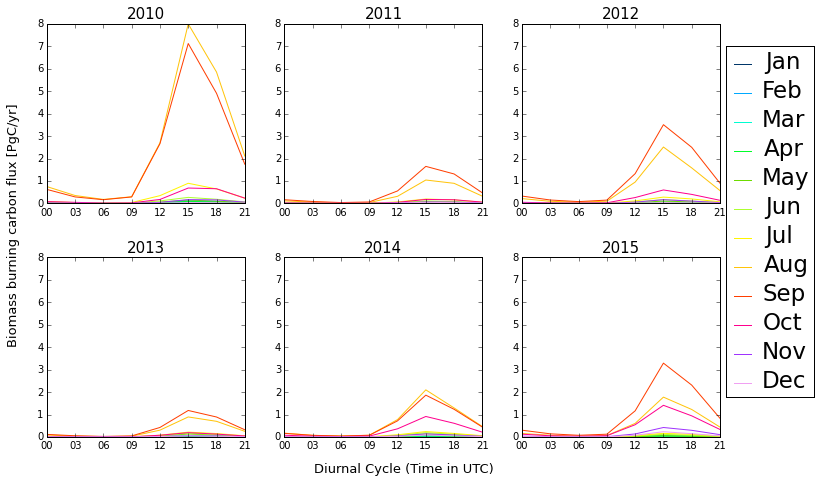

In [14]:
################################################# Plotting ###########################################################
########## 

#color options = 'paired' 'jet' 'gist_rainbow' 'rainbow' 'prism' 'gist_ncar' 'nipy_spectral'

colors = plt.get_cmap('gist_ncar')(np.linspace(0,1,14))

df_2010 = pd.read_pickle('df_2010')
df_2011 = pd.read_pickle('df_2011')
df_2012 = pd.read_pickle('df_2012')
df_2013 = pd.read_pickle('df_2013')
df_2014 = pd.read_pickle('df_2014')
df_2015 = pd.read_pickle('df_2015')

#fig = plt.figure(1,figsize=(50,10))
fig, axes = plt.subplots(nrows=2, ncols=3, sharex=True, sharey=True, figsize=(11,7))
subplots_adjust(left=0.05, bottom=0.08, right=None, top=None, wspace=None, hspace=0.3)
fig.text(0.5, 0.009, 'Diurnal Cycle (Time in UTC)', ha='center',fontsize=13)
fig.text(0, 0.5, 'Biomass burning carbon flux [PgC/yr]', va='center', rotation='vertical',fontsize=13)

ax1 = plt.subplot(231)
#ax1.set_xticklabels(np.arange(dt.datetime(2016,10,31,0,0,0), dt.datetime(2016,11,1,0,0,0),dt.timedelta(hours=3)))
ax1.set_xticks(np.arange(dt.datetime(2016,10,31,0,0,0), dt.datetime(2016,11,1,0,0,0),dt.timedelta(hours=3)))
ax1.xaxis.set_major_formatter(matplotlib.dates.DateFormatter('%H'))
ax1.set_title('2010',fontsize=15)

ax2 = plt.subplot(232)
#ax2.set_xticklabels(np.arange(dt.datetime(2010,1,1,0,0,0), dt.datetime(2010,1,2,0,0,0),dt.timedelta(hours=3)))
ax2.set_xticks(np.arange(dt.datetime(2016,10,31,0,0,0), dt.datetime(2016,11,1,0,0,0),dt.timedelta(hours=3)))
ax2.xaxis.set_major_formatter(matplotlib.dates.DateFormatter('%H'))
ax2.set_title('2011',fontsize=15)

ax3 = plt.subplot(233)
#ax3.set_xticklabels(np.arange(dt.datetime(2010,1,1,0,0,0), dt.datetime(2010,1,2,0,0,0),dt.timedelta(hours=3)))
ax3.set_xticks(np.arange(dt.datetime(2016,10,31,0,0,0), dt.datetime(2016,11,1,0,0,0),dt.timedelta(hours=3)))
ax3.xaxis.set_major_formatter(matplotlib.dates.DateFormatter('%H'))
ax3.set_title('2012',fontsize=15)

ax4 = plt.subplot(234)
#ax4.set_xticklabels(np.arange(dt.datetime(2010,1,1,0,0,0), dt.datetime(2010,1,2,0,0,0),dt.timedelta(hours=3)))
ax4.set_xticks(np.arange(dt.datetime(2016,10,31,0,0,0), dt.datetime(2016,11,1,0,0,0),dt.timedelta(hours=3)))
ax4.xaxis.set_major_formatter(matplotlib.dates.DateFormatter('%H'))
ax4.set_title('2013',fontsize=15)

ax5 = plt.subplot(235)
#ax5.set_xticklabels(np.arange(dt.datetime(2010,1,1,0,0,0), dt.datetime(2010,1,2,0,0,0),dt.timedelta(hours=3)))
ax5.set_xticks(np.arange(dt.datetime(2016,10,31,0,0,0), dt.datetime(2016,11,1,0,0,0),dt.timedelta(hours=3)))
ax5.xaxis.set_major_formatter(matplotlib.dates.DateFormatter('%H'))
ax5.set_title('2014',fontsize=15)

ax6 = plt.subplot(236)
#ax6.set_xticklabels(np.arange(dt.datetime(2010,1,1,0,0,0), dt.datetime(2010,1,2,0,0,0),dt.timedelta(hours=3)))
ax6.set_xticks(np.arange(dt.datetime(2015,1,1,0,0,0), dt.datetime(2015,1,2,0,0,0),dt.timedelta(hours=3)))
ax6.xaxis.set_major_formatter(matplotlib.dates.DateFormatter('%H'))
ax6.set_title('2015',fontsize=15)

for i in range(1,13):
    ax1.plot(df_2010.index,df_2010['%i'%i],color=colors[i])
    ax2.plot(df_2011.index,df_2011['%i'%i],color=colors[i])
    ax3.plot(df_2012.index,df_2012['%i'%i],color=colors[i])
    ax4.plot(df_2013.index,df_2013['%i'%i],color=colors[i])
    ax5.plot(df_2014.index,df_2014['%i'%i],color=colors[i])
    ax6.plot(df_2015.index,df_2015['%i'%i],color=colors[i])
            

ax2.set_ylim([0,8])
ax3.set_ylim([0,8])
ax4.set_ylim([0,8])
ax5.set_ylim([0,8])
ax6.set_ylim([0,8])

ax6.legend(months[:],loc='center left', bbox_to_anchor=(1, 1.2))

leg = plt.gca().get_legend()
ltext  = leg.get_texts()
plt.setp(ltext, fontsize='23') 
#plt.tight_layout()
fig.savefig('Fig4_Average_timesteps_foreach_month_and_yearCASA.png', bbox_extra_artists=(leg,), bbox_inches='tight',DPI=1000)
#plt.show()   
  
''' This plots directly the graph taking the dataframe, dont know how to format it.    
df_2010.plot(title='3 hourly monthly averages - 2010')
df_2011.plot(title='3 hourly monthly averages - 2011')
df_2012.plot(title='3 hourly monthly averages - 2012')
df_2013.plot(title='3 hourly monthly averages - 2013')
df_2014.plot(title='3 hourly monthly averages - 2014')
df_2015.plot(title='3 hourly monthly averages - 2015')
'''

In [11]:
################################## Monthly diurnal Cycle for a selected month ################################################
df_2010.loc['2016-10-31 00:00:00','1']

1.89435

In [10]:
df_2010

,1,2,3,4,5,6,7,8,9,10,11,12
2016-10-31 00:00:00,0.00519,0.00737,0.00527,0.00844,0.01342,0.02435,0.08534,0.75113,0.62437,0.08244,0.02008,0.00415
2016-10-31 03:00:00,0.00279,0.00251,0.00244,0.00408,0.00639,0.01067,0.03894,0.35212,0.28934,0.04801,0.01122,0.00217
2016-10-31 06:00:00,0.00128,0.00231,0.00137,0.00206,0.00333,0.00570,0.02005,0.17844,0.16494,0.01715,0.00415,0.00083
2016-10-31 09:00:00,0.00142,0.00207,0.00217,0.00357,0.00636,0.01225,0.03975,0.29719,0.28906,0.02417,0.00623,0.00132
2016-10-31 12:00:00,0.01404,0.02548,0.02104,0.03268,0.05794,0.11160,0.34618,2.69568,2.65818,0.17666,0.04631,0.01078
2016-10-31 15:00:00,0.05861,0.11529,0.06179,0.09138,0.15062,0.26883,0.89695,7.99254,7.11917,0.68543,0.16915,0.03753
2016-10-31 18:00:00,0.05638,0.08912,0.04223,0.06238,0.10150,0.18511,0.64467,5.84901,4.90367,0.65382,0.15680,0.03139
2016-10-31 21:00:00,0.01663,0.02056,0.01464,0.02288,0.03724,0.06648,0.23409,2.10859,1.74579,0.23559,0.05656,0.01115


In [51]:
np.arange(dt.datetime(2010,1,1,0,0,0), dt.datetime(2010,1,2,0,0,0),dt.timedelta(hours=3))

array(['2010-01-01T00:00:00.000000', '2010-01-01T03:00:00.000000',
       '2010-01-01T06:00:00.000000', '2010-01-01T09:00:00.000000',
       '2010-01-01T12:00:00.000000', '2010-01-01T15:00:00.000000',
       '2010-01-01T18:00:00.000000', '2010-01-01T21:00:00.000000'], dtype='datetime64[us]')